# $\chi$-Space of Lorenz Synchronization
------------------------------------------------
This notebook is an example of the $\chi$-space application over two Lorenz systems with unidirectional coupling.

In [1]:
!pip install MFDFA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install git+https://github.com/rsautter/Chi-Space/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Chi-Space/ to /tmp/pip-req-build-6_kq2gab
  Running command git clone -q https://github.com/rsautter/Chi-Space/ /tmp/pip-req-build-6_kq2gab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Chi-Space: filename=Chi_Space-0.2-py3-none-any.whl size=10939 sha256=03cba91e810ab7c5ac52381341f3eaecfd251018f8bb829ab09ef40637239376
  Stored in directory: /tmp/pip-ephem-wheel-cache-4_r6ygrz/wheels/c5/5a/df/79cde5c2e10c887cd88c700816d547c69f333ef35c9df5ea9f
Successfully built Chi-Space


In [4]:
import chi
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import pandas as pd
import tqdm
import pickle

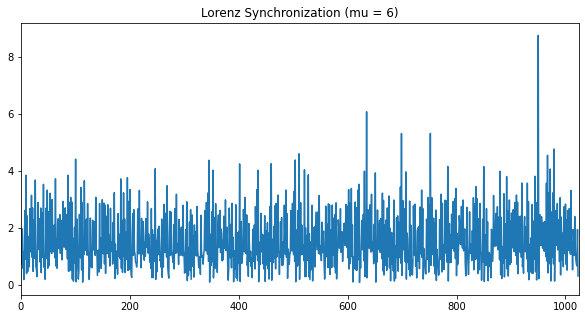

In [ ]:
mu1 = 6
t, r1= chi.lorenzSynch(mup=mu1, n=2**10+100)
r1 = r1[100:]

plt.figure(figsize=(10,5))
plt.plot(r1/np.std(r1))
plt.title(r"Lorenz Synchronization (mu = "+str(mu1)+")")
plt.xlim(0,len(r1))
plt.show()

# 2. Power Spectrum and Singularity Spectrum
-----------------------------------------------------------------

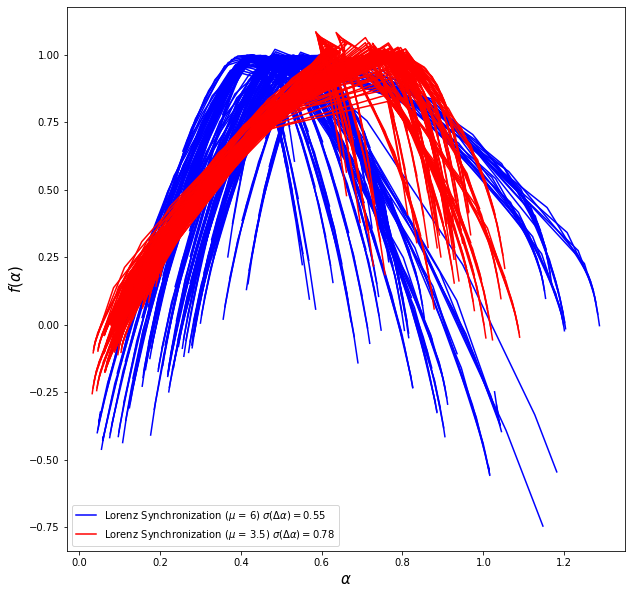

In [ ]:
bas, bfas, w  = chi.autoMFDFA(r1)
xbas, xbfas, xw  = chi.autoMFDFA(r2)

plt.figure(figsize=(10,10))
for i in range(len(bas)):
  if i==0:
    plt.plot(bas[i],bfas[i],color='b',label=r"Lorenz Synchronization ($\mu$ = "+str(mu1)+r") $\sigma(\Delta \alpha )=$"+str(np.round(w,2)))
  else:
    plt.plot(bas[i],bfas[i],color='b')
for i in range(len(xbas)):
  if i == 0:
    plt.plot(xbas[i],xbfas[i],color='r',label=r"Lorenz Synchronization ($\mu$ = "+str(mu2)+r") $\sigma(\Delta \alpha )=$"+str(np.round(xw,2)))  
  else:
    plt.plot(xbas[i],xbfas[i],color='r')
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)
plt.legend()
plt.show()

In [ ]:
print(r"$\mu$="+str(mu1)+":")
print(chi.chiSpace(r1))
print(r"$\mu$="+str(mu2)+":")
print(chi.chiSpace(r2))

$\mu$=6:
{'GQQ': 0.07317163950503924, 'LDA': 0.4819781581175686}
$\mu$=3.5:
{'GQQ': 0.518011955131304, 'LDA': 0.8279124804138381}


In [6]:
nSeries = 600

zL = []
sL = []

for i in tqdm.tqdm(range(nSeries)):
  # random value between [2,6]
  mu = 2 + 4*np.random.rand()
  t, r= chi.lorenzSynch(mu=mu, n=2**10+100)
  r = r[100:]
  zL.append(chi.chiSpace(r,nsamples=10))
  sL.append(pickle.dumps(r))

zL = pd.DataFrame(zL)
zL['serie'] = sL

100%|██████████| 600/600 [17:19<00:00,  1.73s/it]


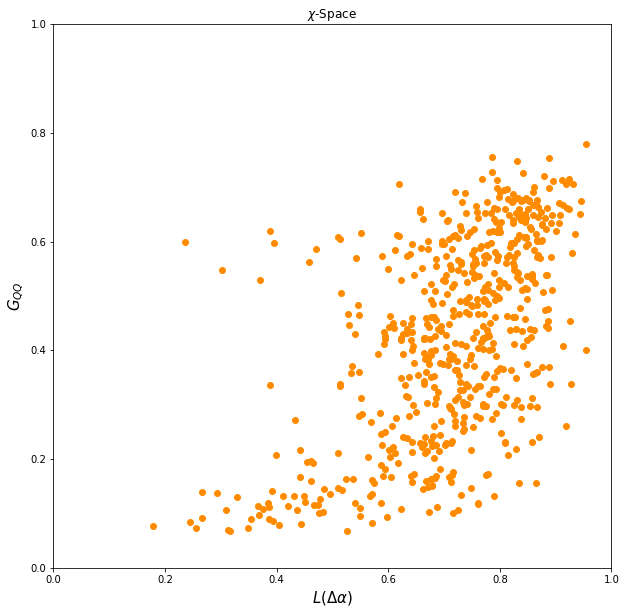

In [7]:
plt.figure(figsize=(10,10))
plt.title(r"$\chi$-Space")
plt.scatter(zL['LDA'], zL['GQQ'],color='darkorange')
plt.xlabel(r"$L (\Delta \alpha)$",fontsize=15)
plt.ylabel("$G_{QQ}$",fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### Data cleaning

There is a particular case of Lorenz synchronization where L($\Delta \alpha$)< 0.55 and $G_{QQ}$ 0.22. It is observed high fluctuations after the event (like the endogenous classical case), however the amplitude of the deviations are by far larger than we tipycally observe in endogenous events. It can be a new class of event, which will be investigated in further works.

The following code searches for this kind of configuration.

  6%|▋         | 13/200 [00:48<11:37,  3.73s/it]


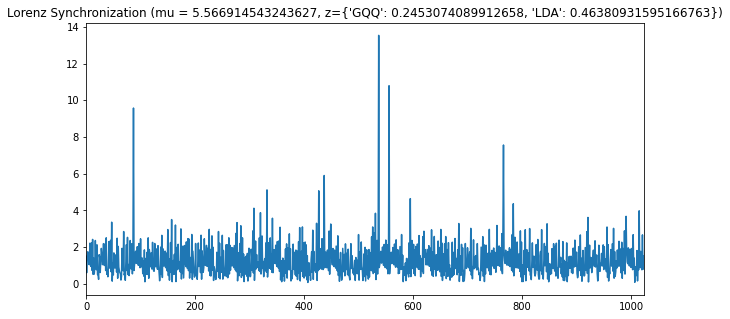

In [ ]:
#mu2 = 3.5
#(df['LDA']<0.55) & (df['GQQ']>0.22)

lda = 0.0
gqq = 0.0
for i in tqdm.tqdm(range(200)):
  mu2 = 2 + 4*np.random.rand()
  t, r2= chi.lorenzSynch(mu=mu2, n=2**10+100)
  r2 = r2[100:]
  xw = chi.chiSpace(r2)
  lda, gqq = xw['LDA'],xw['GQQ']
  if ((lda<0.55)&(gqq>0.22)):
    break

plt.figure(figsize=(10,5))
plt.plot(r2/np.std(r2))
plt.title(r"Lorenz Synchronization (mu = "+str(mu2)+", z="+str(xw)+")")
plt.xlim(0,len(r2))
plt.show()

 10%|█         | 21/200 [01:20<11:27,  3.84s/it]


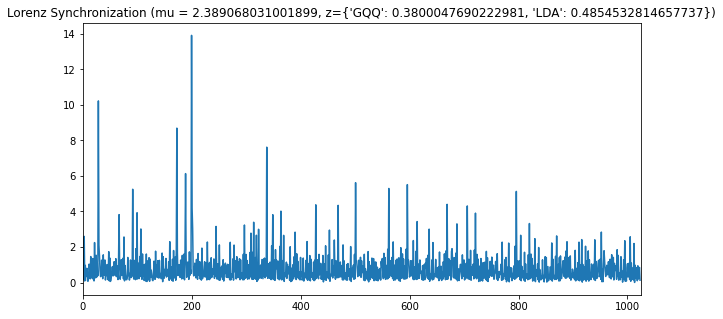

In [ ]:
#mu2 = 3.5
#(df['LDA']<0.55) & (df['GQQ']>0.22)

lda = 0.0
gqq = 0.0
for i in tqdm.tqdm(range(200)):
  mu2 = 2 + 4*np.random.rand()
  t, r2= chi.lorenzSynch(mu=mu2, n=2**10+100)
  r2 = r2[100:]
  xw = chi.chiSpace(r2)
  lda, gqq = xw['LDA'],xw['GQQ']
  if ((lda<0.55)&(gqq>0.22)):
    break

plt.figure(figsize=(10,5))
plt.plot(r2/np.std(r2))
plt.title(r"Lorenz Synchronization (mu = "+str(mu2)+", z="+str(xw)+")")
plt.xlim(0,len(r2))
plt.show()

In [8]:
zL = zL.drop(zL[(zL['LDA']<0.55) & (zL['GQQ']>0.22)].index)
zL = zL.sample(n=400)
zL = zL.reset_index(drop=True)

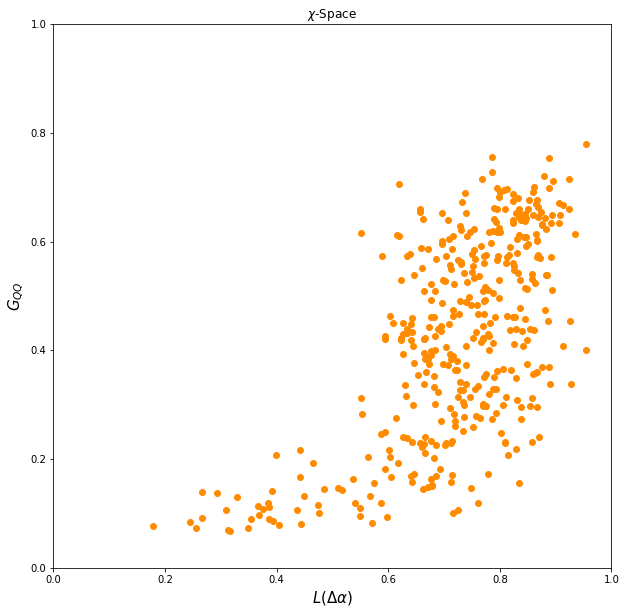

In [9]:
plt.figure(figsize=(10,10))
plt.title(r"$\chi$-Space")
plt.scatter(zL['LDA'], zL['GQQ'],color='darkorange')
plt.xlabel(r"$L (\Delta \alpha)$",fontsize=15)
plt.ylabel("$G_{QQ}$",fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [10]:
zL.to_csv("zLorenz.csv")